In [1]:
import warnings #imported packages 
warnings.filterwarnings('ignore')


import pandas as pd #imported packages 
import numpy as np  #imported packages 
from plotnine import *
from plotnine.data import mtcars

%matplotlib inline

In [2]:
data = "https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/cereal.csv"
#grabs data from online link
cereal = pd.read_csv(data)
#reads data from csv file
cereal.head()
#looks at the first 5 observations of the csv file

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843


In [3]:
cereal["calories"].value_counts()
#exploring the dataset, looking at calorie counts

110    29
100    17
120    10
90      7
50      3
140     3
70      2
150     2
130     2
80      1
160     1
Name: calories, dtype: int64

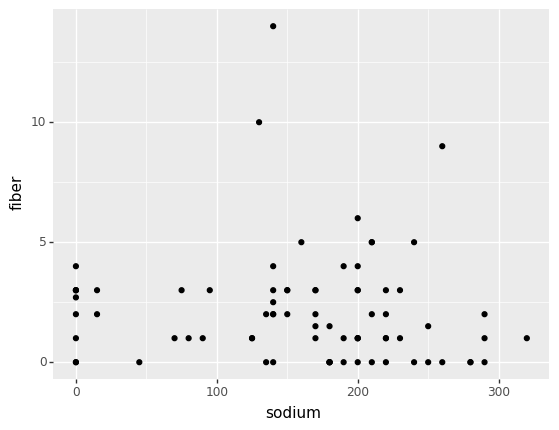

<ggplot: (281300245)>

In [4]:
(ggplot(cereal, aes('sodium', 'fiber'))
 + geom_point())

#plotted the relationship between sodium and fiber

In [5]:
#no clear relationship between sugars and sodium

In [6]:
bar_cereal = cereal.groupby("shelf").agg({"sugars": ["mean", "std", "min"]}) #used the groupby() function and the
# agg() function to be applied on a series or even each element of series separately
bar_cereal.columns = ["sugars", "std", "min"]
bar_cereal["shelf"] = bar_cereal.index

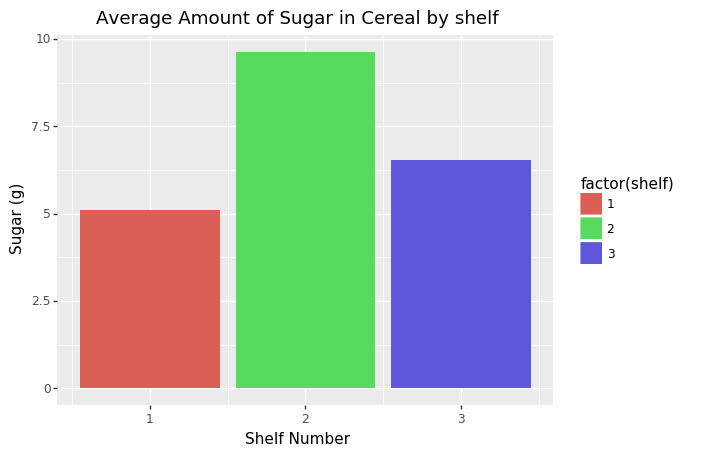

<ggplot: (309875937)>

In [12]:
(ggplot(bar_cereal, aes('shelf', 'sugars', fill = 'factor(shelf)'))
     + geom_bar(stat = "identity")
     + labs(title = "Average Amount of Sugar in Cereal by shelf", x = "Shelf Number", y = "Sugar (g)"))
#plots the shelves based on their shelf positioning relative to their sugar amount
     

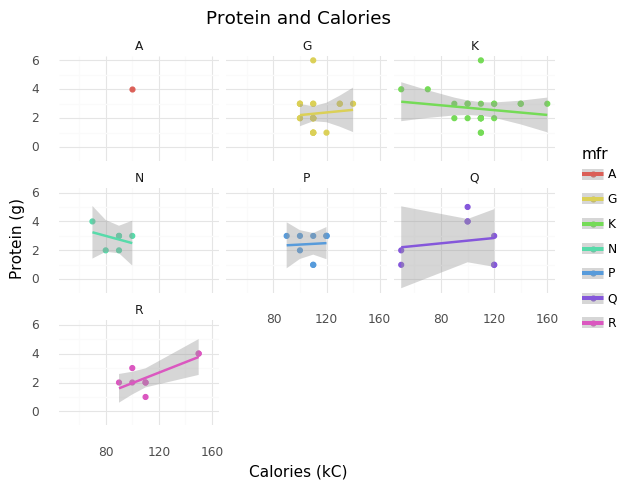

<ggplot: (309468601)>

In [14]:
(ggplot(cereal, aes('calories', 'protein', color = 'mfr'))
 + geom_point() #creates point graph
 + stat_smooth(method='lm') #smooths the slope line
 + facet_wrap('~mfr') #seperates each mfr into its own graph
 + theme_minimal()  
 + labs(title = "Protein and Calories",
     x = "Calories (kC)", y = "Protein (g)")) #labels the graph